<a href="https://colab.research.google.com/github/RedPanda54/Study/blob/main/Theme%2005.%20%ED%81%B0%20%EC%88%98%20%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **큰 수 찾기**

(문제)<br>
<div>
자연수로 채워진 n*n 크기의 행렬이 있다. 행렬 전체를 이루는 n*n 개의 숫자들 중에서, 가장 큰 n개의 숫자들만 골라서 내림차순으로 출력하라.
</div><br>

<ul>
    <li>입력</li>
        <ol>
            <li>첫 번째 줄에 행렬의 크기 n이 주어진다. (1 <= n <= 100)</li>
            <li>두 번째 줄부터 n개의 줄은 행렬을 이루는 숫자들이 나타난다.</li>
            <ul>
                <li>행렬을 이루는 숫자들은 1,000,000 이하의 자연수들이다.</li>
                <li>각 숫자들은 하나의 공백으로 구분된다.</li>
            </ul>
        </ol>
    <li>출력</li>
        <ul>
            <li>가장 큰 n개의 숫자들을 내림차순으로 출력한다.</li>
            <li>숫자 사이에는 공백이 하나씩 있어야 한다.</li>
        </ul>
</ul>

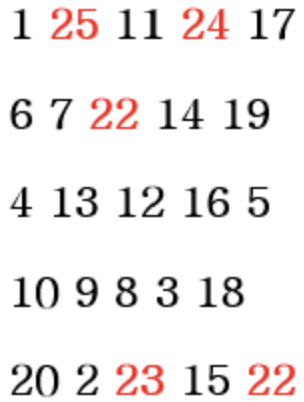

(예시)<br>
- 주어진 5*5 크기의 행렬에서, 가장 큰 5개의 숫자들을 고르면 위와 같이 빨간색의 숫자들이고, 이 숫자들을 내림차순으로 출력하면 (25, 24, 23, 22, 22)이다.

**easy 버전** <br>
1. 2차원의 배열의 각 행을 하나의 리스트에 연결한다.
2. 하나로 연결된 리스트를 대상으로 내림차순을 진행한다.
3. 가장 앞에서부터 5번째까지가 우리가 원하는 큰 수들이다.

(시간 복잡도)<br>
Python 내장 정렬 함수의 시간복잡도가 O(k * logk)<br>
입력의 크기가 최대 n * n = k = 10000이니까
2 * n^2 * log(n)이므로 <br>
**O(n^2*logn)**




In [1]:
# easy 버전
# 입력
n = int(input())
num_list = []

# 각 행을 입력받아서 하나의 리스트에 연결.
for _ in range(n):
	row = tuple(map(int, input().split()))
	num_list.extend(row)

# 내림차순 정렬 후에 정답 출력.
num_list.sort(reverse=True)
print(*num_list[:n])


5
1 25 11 24 17
6 7 22 14 19
4 13 12 16 5
10 9 8 3 18
20 2 23 15 22
25 24 23 22 22


In [6]:
# easy_Heap
# max_heap을 만들어서 큰 수 5개를 찾는 방법.
# Python에서 제공하는 heapq라는 함수는 min_heap을 제공하는데
# 숫자 앞에 마이너스를 붙여서 heapify() 함수를 사용하면 max_heap이 된다.
# max_heap은 가장 큰 수가 루트 노드가 되기 때문에 n번의 heappop()으로 답을 구할 수 있다.
import heapq
n = int(input())
matrix = []
for _ in range(n):
    row = list(map(int, input().split()))
    matrix.extend(row)

matrix = [-x for x in matrix]
heapq.heapify(matrix)

for i in range(n):
    print(-heapq.heappop(matrix), end = ' ' if i != n - 1 else '\n')

5
1 25 11 24 17
6 7 22 14 19
4 13 12 16 5
10 9 8 3 18
20 2 23 15 22
25 24 23 22 22


**medium 버전**<br>
입력의 size가 바뀌었다.

* 입력
  1. 첫 번째 줄에 행렬의 크기 n이 주어진다. **(1 <= n <= 2,000)**
  2. 두 번째 줄부터 n개의 줄은 행렬을 이루는 숫자들이 나타난다.
    * 행렬을 이루는 숫자들은 1,000,000 이하의 자연수이다.
    * 각 숫자들은 하나의 공백으로 구분된다.






1. 구성 숫자가 1,000,000만큼의 count 리스트를 잡아준다.
2. count의 각 인덱스는 각 숫자가 입력된 횟수를 의미한다.
3. 1,000,000번째 인덱스부터 거꾸로 탐색하며 큰 수를 출력한다.

(시간 복잡도)<br>
* 입력을 받아 count에 개수를 매기는 데에 O(n^2)
* count를 거꾸로 탐색하는 과정도 O(n^2)
* 결과적으로 **O(n^2)**만큼의 시간이 소요.
* 시간이 오래걸린다고 생각할 수 있겠으나, 0개인 숫자들도 많기 때문에 평균 속도는 빠르다고 평가할 수 있겠다.

In [3]:
# medium 버전
import sys

# 들어오는 숫자가 적당한 크기로 한정되어 있을 때, 사용 가능한 기술.
# 1,000,000에 0번째 인덱스까지 고려해서 1,000,001만큼의 자리를 생성
n = int(input())
count = [0] * 1000001

# 입력된 숫자들의 개수를 센다.
for _ in range(n):
	row = list(map(int, input().split()))
	for num in row:
		count[num] += 1

# 1,000,000번째 인덱스부터 거꾸로 탐색한다.
for i in range(1000000, 0, -1):
	# 같은 숫자가 여러 번 나올 수가 있으니까 그 자리의 숫자만큼!
	# 그 숫자가 나온 적이 없다면 0이니까 애시당초 반복을 하지 않을 것이다.
	for j in range(count[i]):
		n -= 1 # n개의 큰 숫자를 찾아야하기 때문에 한번 찾으면 빼준다.
		print(i, end=' ' if n else '\n')
		if n <= 0:
			sys.exit()

6
41 39 4 50 6 14
49 3 40 8 44 46
38 5 23 35 18 3
39 15 15 46 17 10
8 20 44 19 37 4
9 1 32 27 41 40
50 49 46 46 44 44


SystemExit: 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


**hard 버전** <br>
구성 숫자들의 size가 증가했다.<br>
* 행렬을 이루는 숫자들은 **2,000,000,000** 이하의 자연수들이다.<br>

이렇게 되면, count라는 리스트를 만들어 숫자를 헤아리는 medium 버전의 코드는 메모리를 너무 많이 차지하기 때문에 비효율적인 방법이 된다.

(해결 방법)<br>
1. n * n의 숫자들에서 각 행의 최대값을 골라낸다.
2. 각 행의 최대값을 하나의 리스트에 저장한다.
3. 최대값을 모아둔 리스트에서 최대값을 모아 하나씩 result 리스트에 append해준다. 이때, 최대값이 있던 자리는 0을 채워서, 그 다음으로 큰 값을 골라낼 수 있도록 처리한다.<br>

(시간 복잡도)<br>

* Python의 내장 함수 max()는 O(n)의 시간이 걸린다.
* max_matrix는 무조건 n개의 길이를 가진다. 그래서 n회 반복이기 때문에 O(n).
* 결과적으로, 이것도 **O(n^2)**의 시간이 걸리겠다. 메모리적으로 더 효율적인 코드라고 생각하면 되겠다.



In [4]:
# hard 버전

# 입력
n = int(input())
matrix = []
for _ in range(n):
	row = list(map(int, input().split()))
	matrix.append(row)

# 각 행의 최대값을 모은 리스트와 결과 리스트
max_matrix = [0] * n
max_matrix = [max(row) for row in matrix]
result = []

# max_matrix의 최대값을 하나씩 result로 옮긴다.
for i in range(n):
	result.append( max(max_matrix) )
	idx = max_matrix.index(result[-1])
	matrix[idx][ matrix[idx].index(result[-1])] = 0
	max_matrix[idx] = max( matrix[idx] )

print(*result)

10
51 8 50 53 86 60 16 2 4 7
73 23 17 11 53 28 59 45 50 78
60 26 40 96 37 50 93 87 61 63
60 61 60 86 90 42 32 38 97 80
89 18 48 85 70 72 84 94 93 25
54 51 5 77 96 12 82 91 99 17
66 64 30 20 83 84 29 71 3 19
98 14 86 65 5 44 36 38 87 7
74 91 11 44 10 29 94 9 21 13
91 9 3 11 79 44 46 63 70 93
99 98 97 96 96 94 94 93 93 93
